# **💳 Credit Card Fraud Detection Using Artificial Neural Networks (ANN)**

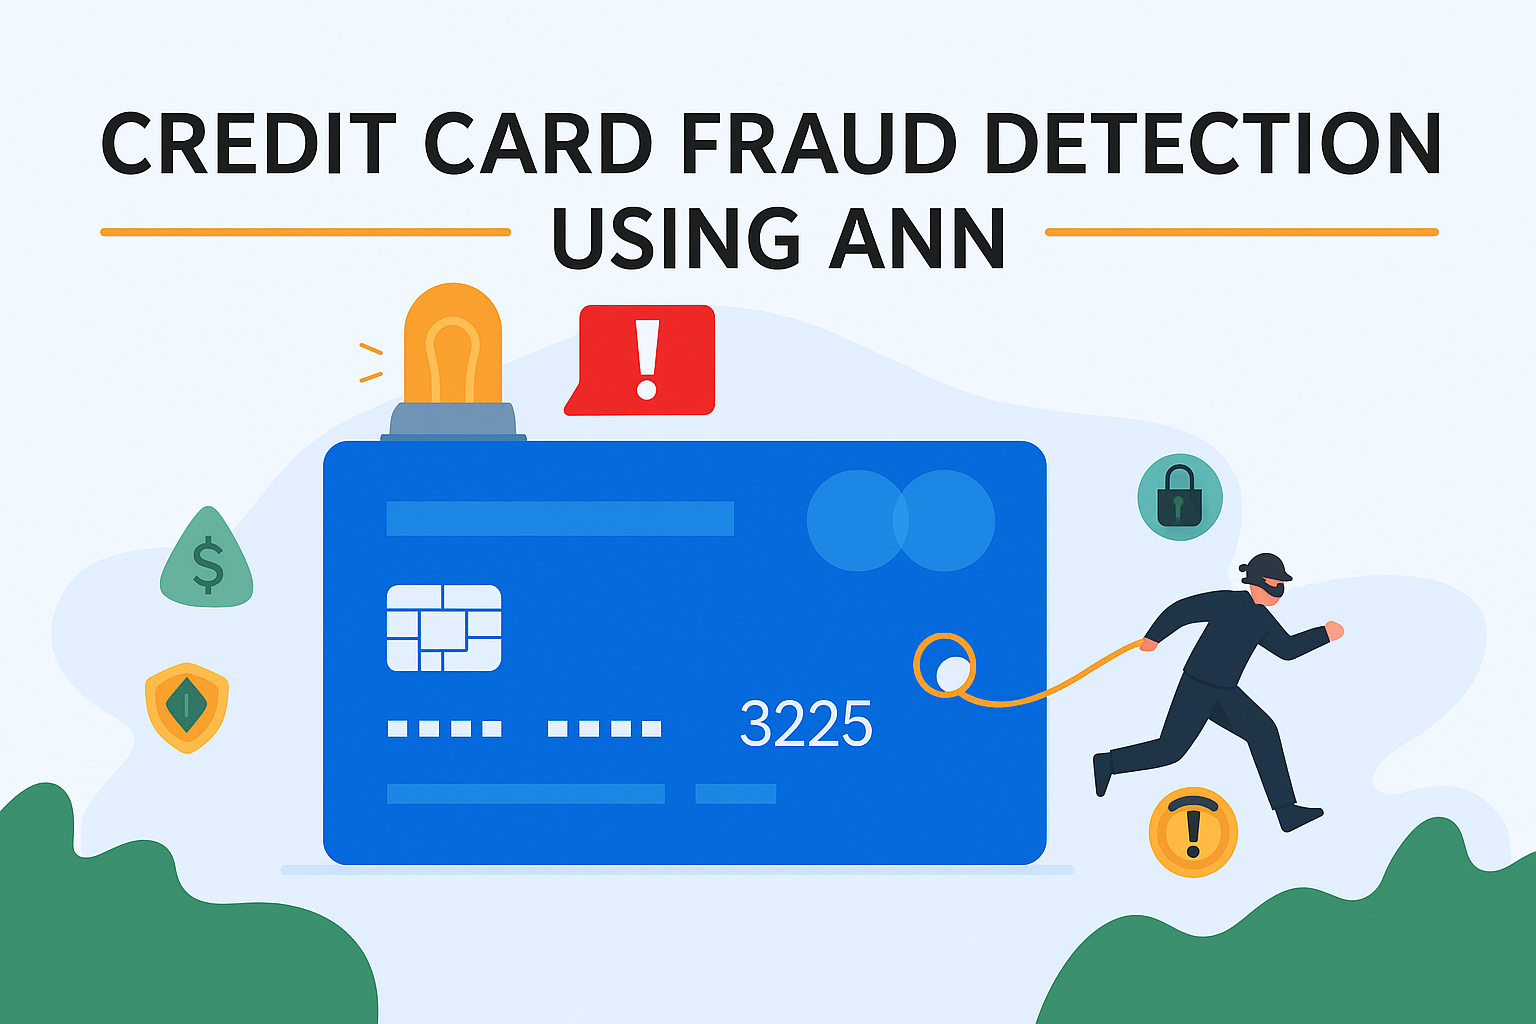

🔍 Importing Libraries

In [176]:
pip install -U keras-tuner

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [178]:
df=pd.read_csv("creditcard.csv")

In [179]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23853,32953,1.296815,-0.518508,0.348800,0.129750,-0.845934,-0.283287,-0.463165,-0.007344,-0.530097,0.611994,-0.839572,-0.238255,-0.682034,0.040107,-0.091270,-2.144114,0.657199,0.305925,-0.899906,-0.604168,-0.498652,-0.791893,0.058456,0.067753,0.367979,0.400899,0.005089,0.008846,14.00,0.0
23854,32954,1.295646,-0.699613,-1.129649,-2.505043,1.428275,3.010605,-0.892932,0.798386,1.309837,-0.970178,0.105836,0.426482,0.134841,0.265772,2.125626,0.109390,-0.779939,0.611425,0.872506,0.124240,0.071540,0.120545,-0.144172,1.066577,0.615628,0.123208,0.013875,0.018547,37.07,0.0
23855,32954,-1.691394,-1.452403,1.671861,-1.769590,1.636843,-0.943701,0.193116,-0.712756,-0.987725,1.101270,0.734150,-0.882691,-0.181673,-0.712363,-0.272218,1.351824,-0.783870,-0.593984,0.797110,0.092588,0.047745,0.539167,-0.698010,-0.470563,0.621828,-0.254508,-0.724865,-0.360165,53.80,0.0
23856,32954,1.112786,0.062772,1.481419,2.922471,-0.905121,0.366357,-0.670663,0.256586,0.599399,0.411398,-1.515738,-0.163763,-1.048557,-0.540107,-1.385328,0.073163,0.056735,-0.196746,-0.559959,-0.247537,0.010125,0.346740,-0.117334,0.416103,0.586102,0.216021,0.042710,0.024984,0.00,0.0


Description about Dataset

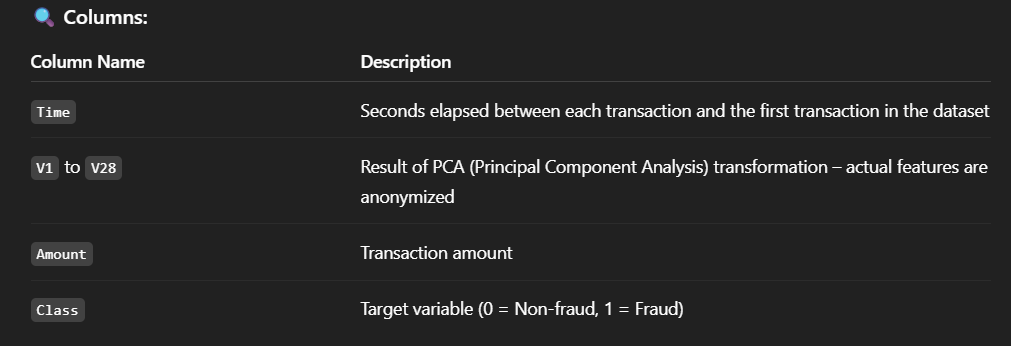

🧹 Data Preprocessing

In [180]:
df.shape

(23858, 31)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

In [182]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23858.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000,23857.000000
mean,18213.370609,-0.239141,0.198892,0.727022,0.248619,-0.188428,0.082789,-0.132080,0.022901,0.499391,-0.166837,0.596166,-0.883128,0.536104,0.448815,0.011486,0.000256,0.248166,-0.057869,-0.054439,0.040821,-0.041192,-0.137287,-0.038435,0.013626,0.127921,0.027504,0.013233,0.004932,73.976583,0.003689
std,11377.032190,1.894219,1.533073,1.724887,1.440938,1.439894,1.328159,1.334691,1.378382,1.274199,1.196665,1.177800,1.541728,1.200873,1.288611,0.968186,0.951385,1.182264,0.853156,0.814489,0.645025,0.837207,0.644720,0.526298,0.588573,0.435896,0.520213,0.401059,0.267790,212.761278,0.060623
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,-14.166795,-2.767470,-17.769143,-3.588761,-19.214325,-4.152532,-12.227189,-18.587366,-8.061208,-4.932733,-13.694584,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6624.750000,-0.959528,-0.376134,0.287941,-0.658457,-0.767634,-0.663707,-0.595277,-0.167688,-0.330826,-0.637079,-0.235627,-2.070288,-0.299876,-0.139187,-0.548979,-0.482896,-0.256711,-0.522422,-0.542287,-0.158099,-0.253906,-0.561223,-0.173814,-0.325615,-0.134460,-0.337167,-0.066242,-0.009446,5.990000,0.000000
50%,20564.000000,-0.288644,0.192491,0.874426,0.216440,-0.218348,-0.179887,-0.066356,0.027183,0.422417,-0.218303,0.577752,-0.580111,0.488744,0.425307,0.139062,0.066423,0.208258,-0.033706,-0.056871,-0.025557,-0.104848,-0.110305,-0.048570,0.064300,0.164769,-0.046463,0.006465,0.020002,18.040000,0.000000
75%,29010.250000,1.164867,0.843146,1.505467,1.122367,0.325281,0.474103,0.450460,0.286111,1.261519,0.273140,1.363638,0.308815,1.424605,1.296569,0.694440,0.555660,0.712368,0.438993,0.453457,0.157144,0.066305,0.273088,0.074189,0.400535,0.407827,0.314884,0.094960,0.077392,66.000000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,12.701539,12.018913,4.846452,4.465413,7.692209,3.635042,6.098529,9.253526,4.295648,4.555359,15.815051,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


In [183]:
df.isnull().sum()/df.shape[0]*100

,0
Time,0.000000
V1,0.000000
V2,0.000000
V3,0.000000
V4,0.000000
V5,0.000000
V6,0.000000
V7,0.000000
V8,0.000000
V9,0.000000


In [184]:
df.dropna(subset=['Class'], inplace=True)

In [185]:
df.isnull().sum()/df.shape[0]*100

,0
Time,0.0
V1,0.0
V2,0.0
V3,0.0
V4,0.0
V5,0.0
V6,0.0
V7,0.0
V8,0.0
V9,0.0


In [186]:
df.duplicated().sum()

np.int64(88)

In [187]:
df.drop_duplicates(inplace=True)


In [188]:
df.duplicated().sum()

np.int64(0)

In [189]:
df['Class'].value_counts()

,count
Class,
0.0,23681
1.0,88


In [190]:
df['Class']=df['Class'].astype('int64')

In [191]:
df['Class'].value_counts()

,count
Class,
0,23681
1,88


<ipython-input-192-7799895efc2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='hls')


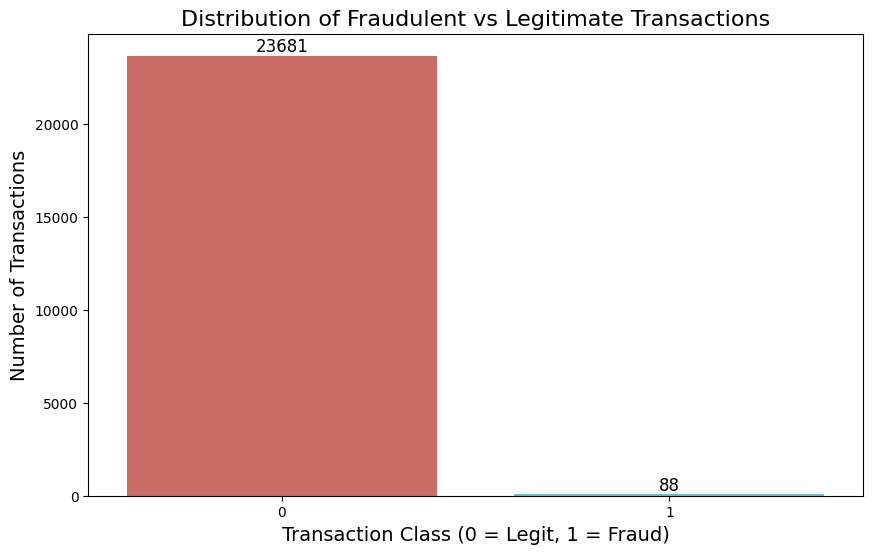

In [192]:
plt.figure(figsize=(10,6))
plt.title('Distribution of Fraudulent vs Legitimate Transactions', fontsize=16)
sns.countplot(x='Class', data=df, palette='hls')

plt.xlabel('Transaction Class (0 = Legit, 1 = Fraud)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',  # cast to int to avoid decimals
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12)

plt.show()

In [193]:
# Clearly there was an issue of class imbalance, we have to solve this otherwise it will badlly affect our Neural network

In [194]:
# lets see the correlation between features

<Axes: >

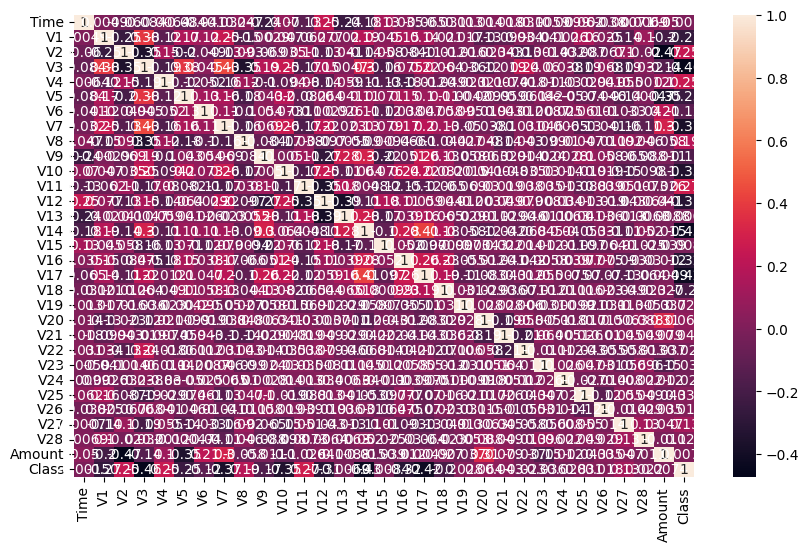

In [195]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [196]:
# Segregatting features

In [197]:
x = df.drop('Class', axis=1)
y = df['Class']

In [198]:
# scaling the features
sc=StandardScaler()
x[['Time','Amount']]=sc.fit_transform(x[['Time','Amount']])

In [199]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [200]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(19015, 30)
(4754, 30)
(19015,)
(4754,)


In [201]:
# Handle class imbalance with SMOTE on training data only
from imblearn.over_sampling import SMOTE

In [202]:
smote= SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [203]:
print(f"Before SMOTE, counts of label '1': {sum(y_train==1)}")
print(f"After SMOTE, counts of label '1': {sum(y_train_resampled==1)}")

Before SMOTE, counts of label '1': 62
After SMOTE, counts of label '1': 18953


In [204]:
x_train_resampled.shape

(37906, 30)

### 🧠 **Building** the ANN Model

In [206]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=30))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [207]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [208]:
# ⏸️ Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [209]:
history=model.fit(x_train_resampled,y_train_resampled,epochs=250,validation_split=0.2,callbacks=[early_stop])

Epoch 1/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8830 - loss: 0.2524 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 2/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9916 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 3/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9956 - loss: 0.0242 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 4/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9957 - loss: 0.0172 - val_accuracy: 1.0000 - val_loss: 3.7728e-04
Epoch 5/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 1.9227e-04
Epoch 6/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9964 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 3.1187e-04
Epoch 7/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9959 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 3.6671e-04
Epoch 8/250
948/948 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9970 - l

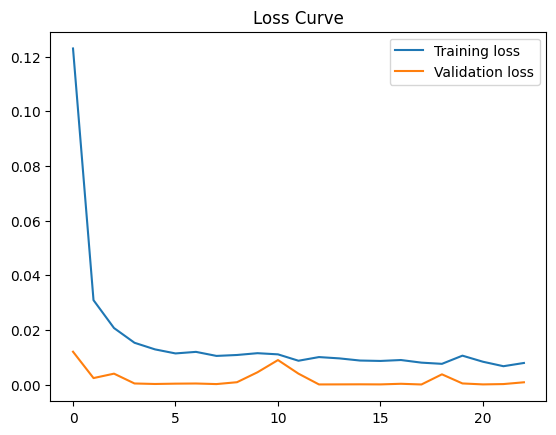

In [210]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

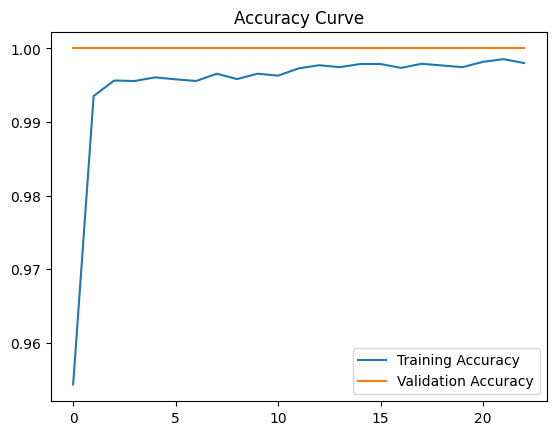

In [211]:
# 📈 Plot Training accuracy History
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

In [212]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print("-----------------------")

cm = confusion_matrix(y_test, y_pred)
print(cm)

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
-----------------------
[[4726    2]
 [   5   21]]


In [213]:
print("\n📉 Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_pred))


📉 Accuracy Score:
0.9985275557425326

📉 Confusion Matrix:
[[4726    2]
 [   5   21]]

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9989    0.9996    0.9993      4728
           1     0.9130    0.8077    0.8571        26

    accuracy                         0.9985      4754
   macro avg     0.9560    0.9036    0.9282      4754
weighted avg     0.9985    0.9985    0.9985      4754

🎯 ROC-AUC Score: 0.903634647923988


In [214]:
# Precision: Of all transactions predicted as fraud, how many were actually fraud = 95.2%

# Recall: Of all actual fraud transactions, how many were correctly detected.= 76.9%

In [215]:
# as our recall is less i want to increase recall (catch more frauds), even if it means a slight drop in precision.

### **Keras Hyper-Paramter Tunning**

In [217]:
def build_model(hp):
  model=Sequential()
  counter=0

  for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
    if counter==0:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation'+ str(i) , values=['relu','tanh','sigmoid']),input_dim=30))

      model.add(Dropout(hp.Choice('Dropout'+ str(i),values=[0.1,0.2,0.3,0.4,0.5])))

    else:
      model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                      activation=hp.Choice('activation'+ str(i) , values=['relu','tanh','sigmoid']), input_dim=30))

    counter+=1
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd','rmsprop','adadelta']),
                loss='binary_crossentropy',metrics=['accuracy'])
  return model

In [218]:
tunner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir',project_name='creditcard')

Reloading Tuner from mydir/creditcard/tuner0.json


In [219]:
tunner.search(x_train_resampled,y_train_resampled,epochs=5,validation_split=0.2)

In [220]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 5,
 'units0': 64,
 'activation0': 'sigmoid',
 'Dropout0': 0.5,
 'optimizer': 'adam',
 'units1': 16,
 'activation1': 'sigmoid',
 'units2': 40,
 'activation2': 'tanh',
 'units3': 80,
 'activation3': 'relu',
 'units4': 16,
 'activation4': 'tanh',
 'units5': 80,
 'activation5': 'sigmoid',
 'units6': 64,
 'activation6': 'sigmoid',
 'units7': 16,
 'activation7': 'tanh'}

In [221]:
model=tunner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 26 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [222]:
model.fit(x_train_resampled,y_train_resampled,epochs=250,initial_epoch=6,validation_data=(x_test,y_test),callbacks=[early_stop])

Epoch 7/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9962 - loss: 0.0156 - val_accuracy: 0.9971 - val_loss: 0.0118
Epoch 8/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9973 - loss: 0.0134 - val_accuracy: 0.9981 - val_loss: 0.0081
Epoch 9/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9980 - loss: 0.0089 - val_accuracy: 0.9989 - val_loss: 0.0067
Epoch 10/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9972 - loss: 0.0132 - val_accuracy: 0.9981 - val_loss: 0.0078
Epoch 11/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9985 - loss: 0.0086 - val_accuracy: 0.9987 - val_loss: 0.0074
Epoch 12/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9981 - loss: 0.0101 - val_accuracy: 0.9977 - val_loss: 0.0087
Epoch 13/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9982 - loss: 0.0101 - val_accuracy: 0.9981 - val_loss: 0.0096
Epoch 14/250
1185/1185 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9982 - l

In [223]:
y_pred= model.predict(x_test)
y_pred=(y_pred>0.45)

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [224]:
print("\n📉 Accuracy Score:")
print(accuracy_score(y_test, y_pred))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

print("🎯 ROC-AUC Score:", roc_auc_score(y_test, y_pred))


📉 Accuracy Score:
0.9987379049221708

📉 Confusion Matrix:
[[4725    3]
 [   3   23]]

📋 Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9994    0.9994      4728
           1     0.8846    0.8846    0.8846        26

    accuracy                         0.9987      4754
   macro avg     0.9420    0.9420    0.9420      4754
weighted avg     0.9987    0.9987    0.9987      4754

🎯 ROC-AUC Score: 0.9419904334244436


**Making prediction on data**

In [227]:
# Making prediction
new_data = np.array([[
    154493, -7.381546986, -7.449015159, -4.696286524, 3.72843915, 6.198304347,
    -6.406266634, -5.83145156, 1.457174919, -0.64620258, -4.02912872, 2.528943021,
    -3.308721722, -1.992009689, -5.757216082, -0.877323474, -1.547551823, -1.909016786,
    0.50056747, 0.136722438, 2.932758126, 1.176574848, -0.978692051, -0.278330343,
    -0.635873794, 0.12353944, 0.404729308, 0.704914654, -1.229991682, 35
]])

new_transaction_scaled = scaler.transform(new_data)





In [228]:
# Make prediction
fraud_prob = model.predict(new_transaction_scaled)

# Apply threshold (you can adjust from 0.5 to 0.4 or lower if needed)
threshold = 0.4
fraud_label = (fraud_prob > threshold).astype("int32")

# Print results
print("🧮 Fraud Probability:", fraud_prob[0][0])
print("🔍 Prediction: ", "FRAUD" if fraud_label[0][0] == 1 else "LEGIT")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
🧮 Fraud Probability: 0.00027522034
🔍 Prediction:  LEGIT


In [229]:
import joblib

# Save scaler
joblib.dump(sc, "scaler.pkl")

# Load scaler later
scaler = joblib.load("scaler.pkl")

In [230]:
# Save the trained model
model.save("fraud_detection_model.h5")

In [231]:
print("Input shape:", new_transaction_scaled.shape)
print("Expected input shape:", model.input_shape)

Input shape: (1, 30)
Expected input shape: (None, 30)


In [232]:
joblib.dump(sc, 'scaler.save')

['scaler.save']

In [246]:
import pickle

In [249]:
with open('model.pkl', 'wb') as file:
  pickle.dump(model, file)

In [239]:
app_code= '''
from flask import Flask, request, jsonify
import numpy as np
import joblib
from tensorflow.keras.models import load_model

app = Flask(__name__)

# Load your trained model and scaler
model = load_model('fraud_detection_model.h5')
scaler = joblib.load('scaler.save')

@app.route('/')
def home():
    return "🚀 Fraud Detection API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.json
        features = np.array(data['features']).reshape(1, -1)  # Expect 30 features
        scaled_features = scaler.transform(features)
        prob = model.predict(scaled_features)[0][0]
        threshold = 0.3
        label = int(prob > threshold)
        return jsonify({
            'fraud_probability': float(prob),
            'prediction': 'FRAUD' if label == 1 else 'LEGIT'
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run(debug=True)
'''
with open("app.py", "w") as f:
    f.write(app_code)
print("✅ app.py created")

✅ app.py created


In [250]:
!pip install flask-ngrok

In [251]:
from flask_ngrok import run_with_ngrok

# Add this line just after `app = Flask(__name__)`
run_with_ngrok(app)

# Then leave `app.run()` like this:
if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.11/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/urllib3/connectionpool.py", line 787, in urlopen
    resp

In [252]:
!python3 app.py

2025-05-17 11:59:39.918298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747483179.942789   43008 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747483179.950180   43008 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/content/app.py", line 5, in <module>
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/__init__.py", line 467, in <module>
    importlib.import_module("keras.src.optimizers")
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  